In [22]:
df = read.csv(file = 'data/covid-mex.csv')

In [23]:
head(df)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,2020-10-25,1c4583,2,12,9,2,9,9,4,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
2,2020-10-25,0d55c9,2,12,9,1,9,9,16,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
3,2020-10-25,002371,1,4,3,2,3,3,8,1,...,2,2,99,1,1,3,99,MÃ©xico,97,97
4,2020-10-25,11fb00,1,12,9,2,9,9,15,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
5,2020-10-25,092521,1,12,9,1,9,9,17,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
6,2020-10-25,0955a5,2,12,6,1,14,6,10,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97


In [24]:
colnames(df)

[1] "FECHA_ACTUALIZACION" "ID_REGISTRO"         "ORIGEN"             
 [4] "SECTOR"              "ENTIDAD_UM"          "SEXO"               
 [7] "ENTIDAD_NAC"         "ENTIDAD_RES"         "MUNICIPIO_RES"      
[10] "TIPO_PACIENTE"       "FECHA_INGRESO"       "FECHA_SINTOMAS"     
[13] "FECHA_DEF"           "INTUBADO"            "NEUMONIA"           
[16] "EDAD"                "NACIONALIDAD"        "EMBARAZO"           
[19] "HABLA_LENGUA_INDIG"  "INDIGENA"            "DIABETES"           
[22] "EPOC"                "ASMA"                "INMUSUPR"           
[25] "HIPERTENSION"        "OTRA_COM"            "CARDIOVASCULAR"     
[28] "OBESIDAD"            "RENAL_CRONICA"       "TABAQUISMO"         
[31] "OTRO_CASO"           "TOMA_MUESTRA"        "RESULTADO_LAB"      
[34] "CLASIFICACION_FINAL" "MIGRANTE"            "PAIS_NACIONALIDAD"  
[37] "PAIS_ORIGEN"         "UCI"

Todas las fechas:

In [25]:
df$FECHA_SINTOMAS = as.Date(df$FECHA_SINTOMAS)
df$FECHA_ACTUALIZACION = as.Date(df$FECHA_ACTUALIZACION)
df$FECHA_DEF[df$FECHA_DEF == '9999-99-99'] = NA
df$FECHA_DEF = as.Date(df$FECHA_DEF)

Se separan los pacientes que sí y no tienen Covid-19.

In [26]:
todos = df[df['RESULTADO_LAB'] < 3,]
head(todos)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
,<date>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,2020-10-25,1c4583,2,12,9,2,9,9,4,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
2,2020-10-25,0d55c9,2,12,9,1,9,9,16,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
3,2020-10-25,002371,1,4,3,2,3,3,8,1,...,2,2,99,1,1,3,99,MÃ©xico,97,97
4,2020-10-25,11fb00,1,12,9,2,9,9,15,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
5,2020-10-25,092521,1,12,9,1,9,9,17,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
6,2020-10-25,0955a5,2,12,6,1,14,6,10,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97


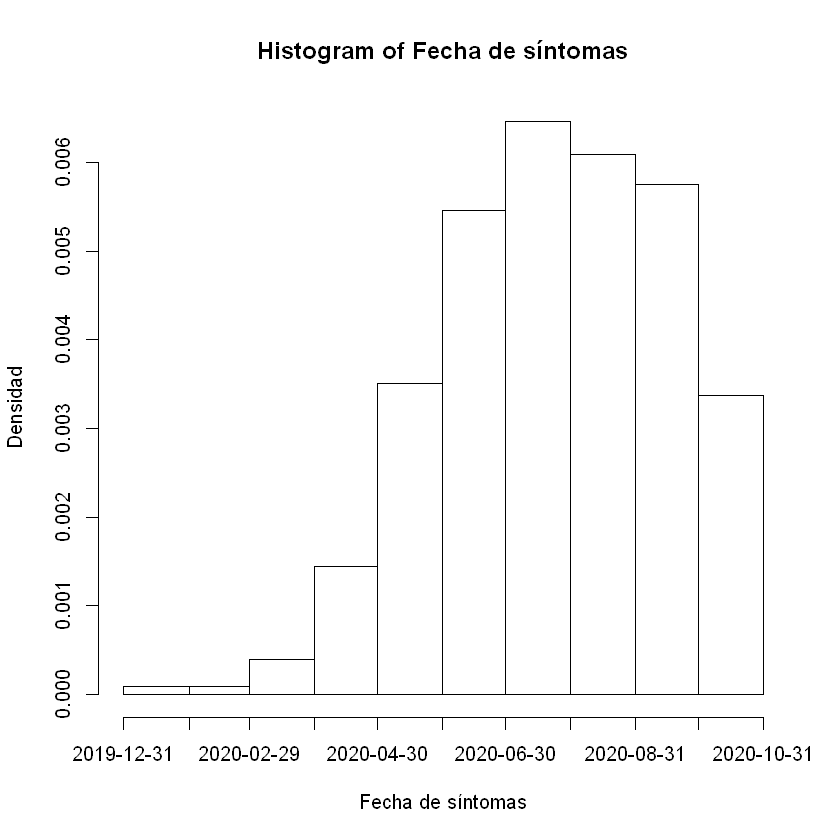

In [28]:
hist(todos$FECHA_SINTOMAS, breaks="months", xlab="Fecha de síntomas", ylab="Densidad")

In [29]:
table(todos$RESULTADO_LAB)


      1       2 
 864696 1072760 

In [32]:
# los verdaderos positivos
0.7 * 864696

[1] 605287.2

In [33]:
# los falsos positivos
864696 - 605287

[1] 259409

In [35]:
# verdaderos negativos
0.7 * 1072760 

[1] 750932

In [37]:
#falsos negativos
1072760 - 750932

[1] 321828

In [38]:
# estimado actualizado de positivos
605287 + 321828

[1] 927115

In [39]:
# estimado para negativos
750932 + 259409

[1] 1010341

In [42]:
# porcentaje de positivos
927115 / 864696

[1] 1.072186

In [43]:
# porcentaje de negativos
1010341 / 1072760 

[1] 0.9418146

In [1]:
864696 + 1072760

[1] 1937456

In [3]:
927115 / 1937456

[1] 0.4785218

In [4]:
1 - 0.4785

[1] 0.5215

In [5]:
(0.4785 * 0.7) / ( (0.4785 * 0.7) + 0.5215 * 0.3  )

[1] 0.6816239